In [2]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from localBlur import LocalKurtosis, GradientHistogramSpan, LocalPowerSpectrumSlope

In [19]:
params = [[(1.03836469274083,0.360097973190199),(0.947234770222116,0.441889606327453)],
[(0.089113883910261,0.0796449095925369),(0.0259784177855934,0.0357503808612129)],
[(-26.358860419625,1.98849960841472),(-28.3796098948851,3.004809639)]]

In [54]:
prior = [0.3,0.7]

### 이미지를 흑백으로 변환

In [4]:
img = cv2.imread('../image/image/out_of_focus0015.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.normalize(img.astype('double'), None, 0.0, 1.0, cv2.NORM_MINMAX)
patchsize = 11

In [5]:
img_gt = cv2.imread('../image/gt/out_of_focus0015.png', cv2.IMREAD_GRAYSCALE)
img_gt[img_gt==255] = 1

### LocalBlurScore 부분

In [6]:
im_height, im_width = img.shape
offset = int((patchsize -1)/2)
x_start = offset+1; x_end = im_width-offset;
y_start = offset+1; y_end = im_height-offset;
datasize = (x_end-x_start+1)*(y_end-y_start+1)

In [7]:
q1 = LocalKurtosis.LocalKurtosis(img, patchsize)

In [8]:
q2 = GradientHistogramSpan.GradientHistogramSpan(img, patchsize)

In [9]:
q3 = LocalPowerSpectrumSlope.LocalPowerSpectrumSlope(img, patchsize)

In [53]:
data = np.zeros((datasize,3))
data[:,0] = np.ravel(q1[y_start:y_end+1,x_start:x_end+1])
data[:,1] = np.ravel(q2[y_start:y_end+1,x_start:x_end+1])
data[:,2] = np.ravel(q3[y_start:y_end+1,x_start:x_end+1])

<IPython.core.display.Javascript object>


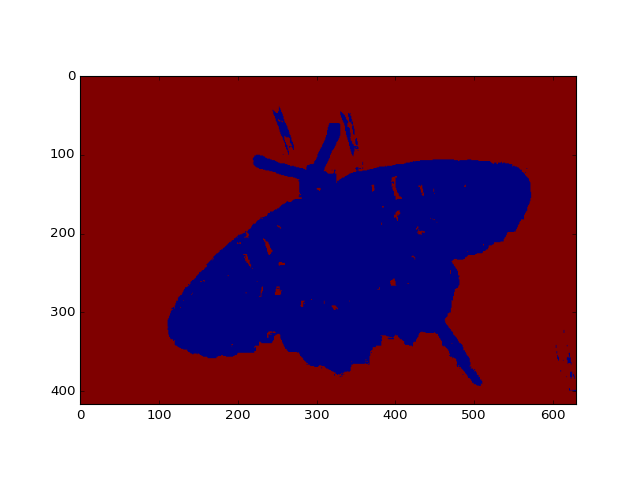

In [55]:
x = posterior(data,params,prior,11)
plt.imshow(x.reshape(417,630))

In [13]:
def _get_gaussian_value(x, param,cl):
    mean = param[cl][0]
    std  = param[cl][1]
    return  1/(np.sqrt(2 * np.pi)*std) * np.e ** (-np.square(x-mean) / (2*np.square(std)))

In [12]:
def _get_prob(x, params, prior, patchsize, cl):
    prob = prior[cl]
    for i in range(3):
        prob = prob * _get_gaussian_value(x[i] , params[i],cl)
    return prob

In [11]:
def posterior(data, params, prior, patchsize):
    result = np.zeros(len(data))
    
    for i in range(len(data)):
        x = data[i]
        prob_0 = _get_prob(x,params,prior,patchsize,0)
        prob_1 = _get_prob(x,params,prior,patchsize,1)
        if prob_0 > prob_1:
            result[i] = 0
        else:
            result[i] = 1
        
    return result

In [57]:
a = 'qwe/12311/123123.jpg'
a.split('/')[-1]

'123123.jpg'